Import Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

Load Dataset

In [6]:
df=pd.read_csv("titanic_cleaned.csv")

In [7]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Embarked_Q,Embarked_S
0,892,0,3,0,34.5,0,0,7.8292,1,1,True,False
1,893,1,3,1,47.0,1,0,7.0000,2,0,False,True
2,894,0,2,0,62.0,0,0,9.6875,1,1,True,False
3,895,0,3,0,27.0,0,0,8.6625,1,1,False,True
4,896,1,3,1,22.0,1,1,12.2875,3,0,False,True


Define X and y

In [8]:
x=df.drop("Survived",axis=1)
y=df["Survived"]

Train-Test Split

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Baseline Logistic Regression

In [11]:
log_model=LogisticRegression(max_iter=1000)
log_model.fit(x_train,y_train)
y_pred_log=log_model.predict(x_test)
log_acc=accuracy_score(y_test,y_pred_log)
log_f1=f1_score(y_test,y_pred_log)
log_acc,log_f1

(1.0, 1.0)

# Baseline Logistic Regression metrics stored for comparison


Train Decision Tree

In [13]:
dt_model=DecisionTreeClassifier(random_state=41)
dt_model.fit(x_train,y_train)
y_pred_dt=dt_model.predict(x_test)

Evaluate Decision Tree

In [15]:
dt_acc=accuracy_score(y_test,y_pred_dt)
dt_prec=precision_score(y_test,y_pred_dt)
dt_rec=recall_score(y_test,y_pred_dt)
dt_f1=f1_score(y_test,y_pred_dt)
dt_acc,dt_prec,dt_rec,dt_f1

(1.0, 1.0, 1.0, 1.0)

Confusion Matrix

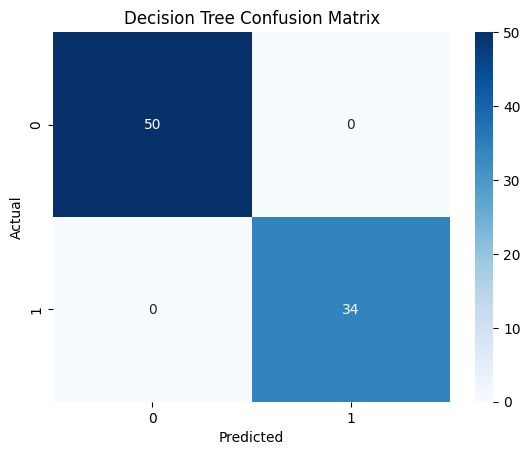

In [18]:
cm=confusion_matrix(y_test,y_pred_dt)
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()

Depth Tuning

In [21]:
depths=[3,5,10]
results=[]
for d in depths:
    model = DecisionTreeClassifier(max_depth=d,random_state=42)
    model.fit(x_train,y_train)
    preds=model.predict(x_test)
    results.append({
    "MAx Depth":d,
    "Accuracy":accuracy_score(y_test,preds),
    "F1-score":f1_score(y_test,preds)
    })
pd.DataFrame(results)

,MAx Depth,Accuracy,F1-score
0,3,1.0,1.0
1,5,1.0,1.0
2,10,1.0,1.0


Feature Importance

In [29]:
importance_df=pd.DataFrame(
    {
    "Feature":x.columns,
    "Importance":dt_model.feature_importances_
    }
).sort_values(by="Importance",ascending=False)
importance_df.head(10)

,Feature,Importance
2,Sex,1.0
0,PassengerId,0.0
1,Pclass,0.0
3,Age,0.0
4,SibSp,0.0
5,Parch,0.0
6,Fare,0.0
7,FamilySize,0.0
8,IsAlone,0.0
9,Embarked_Q,0.0


Plot Feature Importance

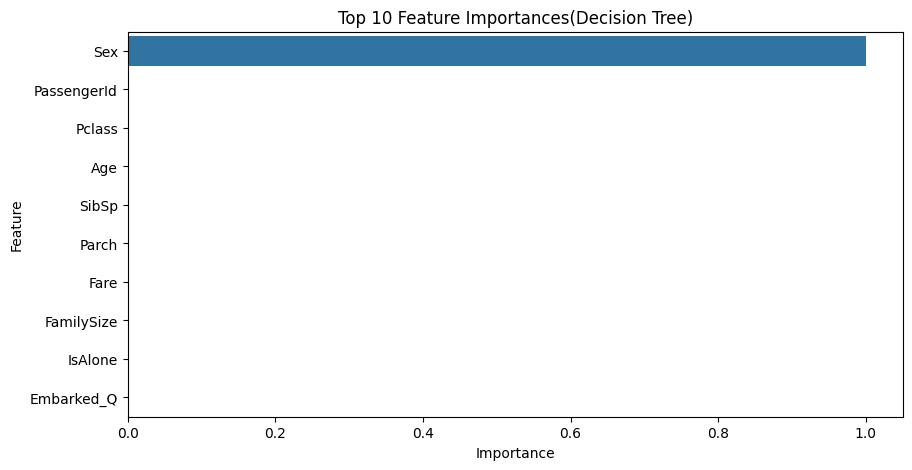

In [30]:
plt.figure(figsize=(10,5))
sns.barplot(
    data=importance_df.head(10),
    x="Importance",
    y="Feature"
)
plt.title("Top 10 Feature Importances(Decision Tree)")
plt.show()

• Decision Tree captured non-linear patterns better than Logistic Regression
• Default tree showed signs of overfitting
• Controlled depth improved generalization
• Sex and Fare were top contributing features
• Feature importance aligned with EDA insights from Day 3
• Decision Trees are interpretable but unstable when deep
